In [350]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
%matplotlib inline

In [125]:
adult_file_2016 = pd.read_csv("..//data//adult_file_2016.csv")

adult_file_2015 = pd.read_csv("..//data//adult_file_2015.csv")

adult_file_2014 = pd.read_csv("..//data//adult_file_2014.csv")

adult_file_2013 = pd.read_csv("..//data//adult_file_2013.csv")

adult_file_2012 = pd.read_csv("..//data//adult_file_2012.csv")

adult_file_2011 = pd.read_csv("..//data//adult_file_2011.csv")

adult_file_2010 = pd.read_csv("..//data//adult_file_2010.csv")

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (203) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (559,563,566,569,572) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [126]:
col_list = pd.read_csv("..//output//col_list.csv")

col_list_val=col_list['col_name'].tolist()

In [127]:
adult_file_2015['FLUVACYR']=np.where((adult_file_2015['SHTFLU2']==1) | (adult_file_2015['SPRFLU2']==1) ,1,0)

adult_file_2014['FLUVACYR']=np.where((adult_file_2014['SHTFLU2']==1) | (adult_file_2014['SPRFLU2']==1) ,1,0)

adult_file_2013['FLUVACYR']=np.where((adult_file_2013['SHTFLU2']==1) | (adult_file_2013['SPRFLU2']==1) ,1,0)

adult_file_2012['FLUVACYR']=np.where((adult_file_2012['SHTFLU2']==1) | (adult_file_2012['SPRFLU2']==1) ,1,0)

adult_file_2011['FLUVACYR']=np.where((adult_file_2011['SHTFLU2']==1) | (adult_file_2011['SPRFLU2']==1) ,1,0)

adult_file_2010['FLUVACYR']=np.where((adult_file_2010['SHTFLU2']==1) | (adult_file_2010['SPRFLU2']==1) ,1,0)

In [471]:
adult_file_2016['FLUVACYR']=np.where(adult_file_2016['FLUVACYR']==1,1,0)

In [128]:
final_col_list=[item for item in list(adult_file_2010.columns) if item in col_list_val]

In [129]:
final_col_list.append('SRVY_YR')

In [131]:
adult_file_2016['DIBEV']=adult_file_2016['DIBEV1']

In [132]:
adult_file_2010 = adult_file_2010[final_col_list]
adult_file_2011 = adult_file_2011[final_col_list]
adult_file_2012 = adult_file_2012[final_col_list]
adult_file_2013 = adult_file_2013[final_col_list]
adult_file_2014 = adult_file_2014[final_col_list]
adult_file_2015 = adult_file_2015[final_col_list]
adult_file_2016 = adult_file_2016[final_col_list]

In [133]:
master_data = pd.concat([adult_file_2016,adult_file_2015,adult_file_2014,adult_file_2013,adult_file_2012,adult_file_2011,adult_file_2010])

In [134]:
master_data['SRVY_YR'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010], dtype=int64)

In [135]:
master_data=master_data.fillna(9999)

In [469]:
master_data_2016

,WTIA_SA,WTFA_SA,REGION,SEX,HISPAN_I,AGE_P,R_MARITL,DOINGLWA,WHYNOWKA,EVERWRK,...,SHTPNUYR,AHEP,SHTHEPB,SHTHEPA,SHEPANUM,SHINGLES,SHTTD,FLUVACYR,SRVY_YR,Cluster_Label
0,11241.0,27602.0,2.0,1.0,12.0,22.0,8.0,3.0,9999.0,1.0,...,1,0,1,1,0,0,1,0,2016.0,0
1,5620.5,10921.0,2.0,2.0,12.0,24.0,5.0,1.0,9999.0,9999.0,...,0,0,0,0,0,0,0,0,2016.0,0
2,2919.3,2575.0,3.0,1.0,12.0,76.0,5.0,5.0,3.0,1.0,...,0,0,0,0,0,0,1,1,2016.0,2
3,6663.0,7059.0,4.0,2.0,3.0,36.0,2.0,1.0,9999.0,9999.0,...,0,0,0,0,0,0,0,1,2016.0,0
4,3300.8,3497.0,3.0,2.0,3.0,35.0,7.0,1.0,9999.0,9999.0,...,0,0,1,0,0,0,1,0,2016.0,3
5,12104.5,19863.0,3.0,2.0,1.0,20.0,7.0,3.0,9999.0,2.0,...,0,0,0,0,0,0,1,0,2016.0,5
6,2925.2,3933.0,3.0,2.0,12.0,19.0,7.0,5.0,2.0,1.0,...,0,0,1,0,0,0,1,1,2016.0,0
7,2878.2,3120.0,2.0,2.0,12.0,45.0,7.0,5.0,6.0,2.0,...,1,0,0,0,0,0,1,1,2016.0,5
8,1816.0,3289.0,4.0,2.0,12.0,18.0,7.0,1.0,9999.0,9999.0,...,0,0,0,0,0,0,1,0,2016.0,0
9,4283.3,7029.0,4.0,2.0,3.0,20.0,7.0,5.0,2.0,1.0,...,0,0,0,0,0,0,1,0,2016.0,2


In [136]:
def convert_x(x):
    try:
        return float(x)
    except:
        return 9999

In [137]:
for col in list(master_data.columns):
    master_data[col]= master_data[col].apply(convert_x)

In [138]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform( master_data )

In [87]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    print(num_clusters)
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [88]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:20]

,cluster_errors,num_clusters
0,2.605680e+07,1
1,2.243616e+07,2
2,2.073467e+07,3
3,1.897257e+07,4
4,1.800216e+07,5
5,1.715964e+07,6
6,1.657961e+07,7
7,1.612988e+07,8
8,1.580630e+07,9
9,1.538486e+07,10


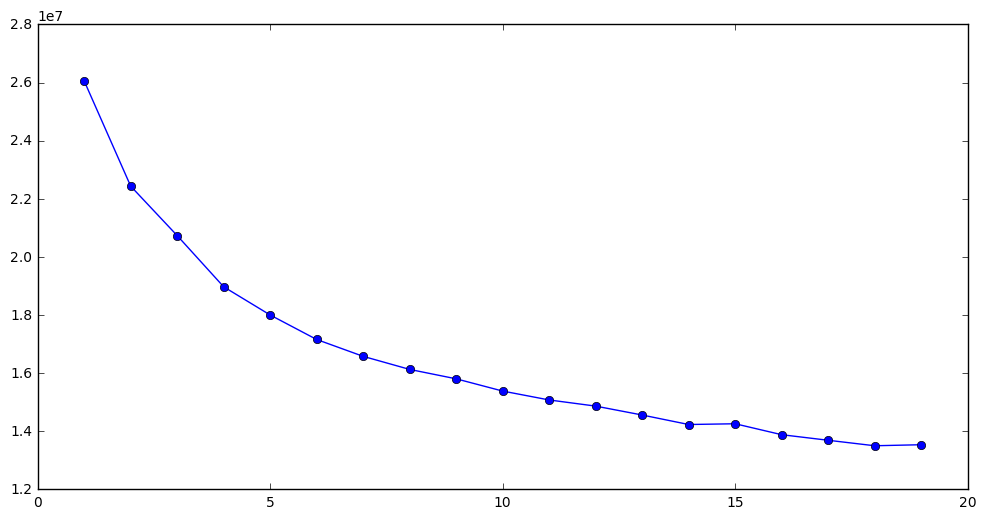

In [89]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [139]:
clusters = KMeans( 6 )
clusters.fit( X_scaled )
master_data['Cluster_Label']=clusters.labels_

In [140]:
pd.pivot_table(master_data,index=['Cluster_Label','SRVY_YR'],values=['WTIA_SA'],aggfunc=len)

WTIA_SA
Cluster_Label SRVY_YR         
0             2010.0   10143.0
              2011.0   12703.0
              2012.0   13046.0
              2013.0   13295.0
              2014.0   14188.0
              2015.0   13165.0
              2016.0   12998.0
1             2010.0    5600.0
              2011.0    7096.0
              2012.0    7421.0
              2013.0    7558.0
              2014.0    8300.0
              2015.0    7926.0
              2016.0    8453.0
2             2010.0    4482.0
              2011.0    5167.0
              2012.0    5568.0
              2013.0    5498.0
              2014.0    5775.0
              2015.0    5276.0
              2016.0    4661.0
3             2010.0    4860.0
              2011.0    5938.0
              2012.0    6057.0
              2013.0    5859.0
              2014.0    6040.0
              2015.0    5076.0
              2016.0    5096.0
4             2010.0     379.0
              2011.0     218.0
              2012.0     505.0
              2013.0     345.0
              2014.0     429.0
              2015.0     439.0
              2016.0     359.0
5             2010.0    1693.0
              2011.0    1892.0
              2012.0    1928.0
              2013.0    2002.0
              2014.0    1965.0
              2015.0    1790.0
              2016.0    1461.0

In [141]:
master_data_2016 = master_data[master_data['SRVY_YR']==2016]

In [277]:
Master_Data=pd.DataFrame(pd.pivot_table(master_data_2016,index=['Cluster_Label'],values=['SRVY_YR'],aggfunc=len).as_matrix(),columns=['Varriable_Value'])

In [301]:
Master_Data['Population_Name']=Master_Data.index
Master_Data['Varriable_Type']="Cluster"
Master_Data['Population_Name']=Master_Data['Population_Name'].astype(str)
Master_Data['Population_Name']=Master_Data['Varriable_Type']+" "+Master_Data['Population_Name']
Master_Data['Varribale_Name']="Cluster_Size"
Master_Data['Year']=None

In [326]:
Master_Data.columns=['Varriable_Value','Population_Name','Varriable_Type','Varriable_Name','Year']

In [142]:
col_list_final=col_list[col_list['col_name'].isin(final_col_list)]

In [143]:
col_list_final['Category_1'].unique()

array(['Alcohol', 'BMI', 'Body Pain', 'Demographic', 'Doctor Visit',
       'Employment', 'Exercise', 'Healthcare Availablity', 'Affordablity',
       'Home Care', 'Medical Status', 'Smoking', 'Vaccination'], dtype=object)

In [144]:
col_list_final[col_list_final['Category_1']=='Medical Status']['col_name'].tolist()

['DIBEV',
 'HYPEV',
 'CHDEV',
 'HRTEV',
 'AASMEV',
 'ULCEV',
 'CANEV',
 'AHAYFYR',
 'SINYR',
 'CBRCHYR',
 'KIDWKYR',
 'LIVYR',
 'ARTH1',
 'AHEP']

In [147]:
def medical_val(x):
    if int(x)== 1:
        return 1
    else:
        return 0

In [148]:
for col in col_list_final[col_list_final['Category_1']=='Medical Status']['col_name'].tolist():
    master_data_2016[col]= master_data_2016[col].apply(medical_val)

Medical_Status = master_data_2016[col_list_final[col_list_final['Category_1']=='Medical Status']['col_name'].tolist()]

Medical_Status['Cluster_Label']=master_data_2016['Cluster_Label']

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [163]:
Medical_Status_final=pd.pivot_table(Medical_Status,index=['Cluster_Label'],values=col_list_final[col_list_final['Category_1']=='Medical Status']['col_name'].tolist() ,aggfunc=np.sum)        

In [303]:
Medical_Status_final

,AASMEV,AHAYFYR,AHEP,ARTH1,CANEV,CBRCHYR,CHDEV,DIBEV,HRTEV,HYPEV,KIDWKYR,LIVYR,SINYR,ULCEV
Cluster_Label,,,,,,,,,,,,,,
0,1668,864,244,2014,773,231,184,578,584,2829,69,136,1273,502
1,1252,773,353,4094,1888,531,991,1675,1413,4876,396,271,1359,895
2,566,311,115,1135,430,168,243,564,377,1604,143,85,500,244
3,802,344,222,1512,478,412,267,495,427,1761,130,154,689,565
4,41,22,0,68,39,11,14,25,24,107,11,8,38,20
5,180,101,36,347,79,68,106,182,113,487,55,24,157,88


In [327]:
del(Medical_master)

In [328]:
for col in list(Medical_Status_final.columns):
    Medical_master_1=pd.DataFrame(Medical_Status_final[col])
    Medical_master_1.columns=['Varriable_Value']
    Medical_master_1['Population_Name'] = "Cluster "+Medical_Status_final.index.astype(str)
    Medical_master_1['Varriable_Name'] = col
    Medical_master_1['Varriable_Type'] = "Medical Condition"
    try:
        Medical_master = pd.concat([Medical_master,Medical_master_1])
    except:
        Medical_master=Medical_master_1.copy()

In [329]:
Medical_master

,Varriable_Value,Population_Name,Varriable_Name,Varriable_Type
Cluster_Label,,,,
0,1668,Cluster 0,AASMEV,Medical Condition
1,1252,Cluster 1,AASMEV,Medical Condition
2,566,Cluster 2,AASMEV,Medical Condition
3,802,Cluster 3,AASMEV,Medical Condition
4,41,Cluster 4,AASMEV,Medical Condition
5,180,Cluster 5,AASMEV,Medical Condition
0,864,Cluster 0,AHAYFYR,Medical Condition
1,773,Cluster 1,AHAYFYR,Medical Condition
2,311,Cluster 2,AHAYFYR,Medical Condition


In [306]:
col_list_final[col_list_final['col_name'].isin(list(Medical_Status_final.columns))]

,col_name,Category_1,Category_2
119,DIBEV,Medical Status,Diabetic
120,HYPEV,Medical Status,Hypertension
122,CHDEV,Medical Status,Heart Disease
123,HRTEV,Medical Status,Heart Disease
124,AASMEV,Medical Status,Asthma
125,ULCEV,Medical Status,Ulcer
127,CANEV,Medical Status,Cancer
128,AHAYFYR,Medical Status,Hay Fever
129,SINYR,Medical Status,Sinustis
130,CBRCHYR,Medical Status,Chronic Bronchitis


In [167]:
col_list_final[col_list_final['Category_1']=='Vaccination']['col_name'].tolist()

['FLUVACYR', 'SHTPNUYR', 'SHTHEPB', 'SHTHEPA', 'SHEPANUM', 'SHINGLES', 'SHTTD']

In [168]:
for col in col_list_final[col_list_final['Category_1']=='Vaccination']['col_name'].tolist():
    master_data_2016[col]= master_data_2016[col].apply(medical_val)

Vaccine_Status = master_data_2016[col_list_final[col_list_final['Category_1']=='Vaccination']['col_name'].tolist()]

Vaccine_Status['Cluster_Label'] = master_data_2016['Cluster_Label']

Vaccine_Status_final=pd.pivot_table(Vaccine_Status,index=['Cluster_Label'],values=col_list_final[col_list_final['Category_1']=='Vaccination']['col_name'].tolist() ,aggfunc=np.sum)        

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [339]:
Vaccine_Status_final

,FLUVACYR,SHEPANUM,SHINGLES,SHTHEPA,SHTHEPB,SHTPNUYR,SHTTD
Cluster_Label,,,,,,,
0,5364,330,897,2305,4445,2035,8532
1,5036,108,2410,690,1539,4432,5155
2,2106,87,557,599,1161,1328,2353
3,1656,79,319,618,1392,1286,3049
4,2,0,0,1,1,0,0
5,617,24,141,155,277,408,637


In [340]:
del(Vaccine_master)

In [341]:
for col in list(Vaccine_Status_final.columns):
    Vaccine_master_1=pd.DataFrame(Vaccine_Status_final[col])
    Vaccine_master_1.columns=['Varriable_Value']
    Vaccine_master_1['Population_Name'] = "Cluster "+Vaccine_Status_final.index.astype(str)
    Vaccine_master_1['Varriable_Name'] = col
    Vaccine_master_1['Varriable_Type'] = "Vaccine Adherence"
    try:
        Vaccine_master = pd.concat([Vaccine_master,Vaccine_master_1])
    except:
        Vaccine_master=Vaccine_master_1.copy()

In [342]:
Vaccine_master

,Varriable_Value,Population_Name,Varriable_Name,Varriable_Type
Cluster_Label,,,,
0,5364,Cluster 0,FLUVACYR,Vaccine Adherence
1,5036,Cluster 1,FLUVACYR,Vaccine Adherence
2,2106,Cluster 2,FLUVACYR,Vaccine Adherence
3,1656,Cluster 3,FLUVACYR,Vaccine Adherence
4,2,Cluster 4,FLUVACYR,Vaccine Adherence
5,617,Cluster 5,FLUVACYR,Vaccine Adherence
0,330,Cluster 0,SHEPANUM,Vaccine Adherence
1,108,Cluster 1,SHEPANUM,Vaccine Adherence
2,87,Cluster 2,SHEPANUM,Vaccine Adherence


In [334]:
Master_Data.columns

Index(['Varriable_Value', 'Population_Name', 'Varriable_Type',
       'Varriable_Name', 'Year'],
      dtype='object')

In [336]:
Medical_master.columns

Index(['Varriable_Value', 'Population_Name', 'Varriable_Name',
       'Varriable_Type'],
      dtype='object')

In [343]:
Vaccine_master.columns

Index(['Varriable_Value', 'Population_Name', 'Varriable_Name',
       'Varriable_Type'],
      dtype='object')

In [345]:
pd.concat([Master_Data,Medical_master,Vaccine_master]).to_csv("..//output//Master_Data.csv",index=False)

In [388]:
Master_Data=pd.concat([Master_Data,Medical_master,Vaccine_master])

In [174]:
col_list_final[col_list_final['Category_1']=='Affordablity']['col_name'].tolist()

['AHCAFYR1', 'AHCAFYR2', 'AHCAFYR3', 'AHCAFYR4']

In [178]:
for col in col_list_final[col_list_final['Category_1']=='Affordablity']['col_name'].tolist():
    master_data_2016[col]= master_data_2016[col].apply(medical_val)

Affordablity_Status = master_data_2016[col_list_final[col_list_final['Category_1']=='Affordablity']['col_name'].tolist()]

Affordablity_Status['Cluster_Label'] = master_data_2016['Cluster_Label']

Affordablity_Status_final=pd.pivot_table(Affordablity_Status,index=['Cluster_Label'],values=col_list_final[col_list_final['Category_1']=='Affordablity']['col_name'].tolist() ,aggfunc=np.sum)        

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
for col in list(Affordablity_Status_final.columns):
    Vaccine_master_1=pd.DataFrame(Affordablity_Status_final[col])
    Vaccine_master_1.columns=['Varriable_Value']
    Vaccine_master_1['Population_Name'] = "Cluster "+Affordablity_Status_final.index.astype(str)
    Vaccine_master_1['Varriable_Name'] = col
    Vaccine_master_1['Varriable_Type'] = "Vaccine Adherence"
    try:
        Vaccine_master = pd.concat([Vaccine_master,Vaccine_master_1])
    except:
        Vaccine_master=Vaccine_master_1.copy()

In [185]:
col_list_final[col_list_final['Category_1']=='Healthcare Availablity']['col_name'].tolist()

['AHCDLYR1', 'AHCDLYR2', 'AHCDLYR3', 'AHCDLYR4', 'AHCDLYR5']

In [189]:
for col in col_list_final[col_list_final['Category_1']=='Healthcare Availablity']['col_name'].tolist():
    master_data_2016[col]= master_data_2016[col].apply(medical_val)

Availablity_Status = master_data_2016[col_list_final[col_list_final['Category_1']=='Healthcare Availablity']['col_name'].tolist()]

Availablity_Status['Cluster_Label'] = master_data_2016['Cluster_Label']

Availablity_Status_final=pd.pivot_table(Availablity_Status,index=['Cluster_Label'],values=col_list_final[col_list_final['Category_1']=='Healthcare Availablity']['col_name'].tolist() ,aggfunc=np.sum)        

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [190]:
Availablity_Status_final

,AHCDLYR1,AHCDLYR2,AHCDLYR3,AHCDLYR4,AHCDLYR5
Cluster_Label,,,,,
0,305,859,431,394,91
1,256,585,416,187,237
2,108,220,189,89,92
3,209,432,349,209,249
4,3,4,4,1,1
5,38,70,81,26,68


In [373]:
Master_Data.columns

Index(['Varriable_Value', 'Population_Name', 'Varriable_Type',
       'Varriable_Name', 'Year'],
      dtype='object')

In [390]:
Master_Data=pd.concat([Master_Data,static_master_data])

In [385]:
static_master_data = pd.DataFrame(Medical_Status_final.T.describe().T['75%'].astype(int).as_matrix())
static_master_data.columns=['Varriable_Value']
static_master_data['Varriable_Type']="Index Varriable"
static_master_data['Varriable_Name']="Prevelant Medical Condition"
static_master_data['Population_Name']="Cluster "+ static_master_data.index.astype(str)

In [386]:
static_master_data

,Varriable_Value,Varriable_Type,Varriable_Name,Population_Name
0,1170,Index Varriable,Prevelant Medical Condition,Cluster 0
1,1609,Index Varriable,Prevelant Medical Condition,Cluster 1
2,548,Index Varriable,Prevelant Medical Condition,Cluster 2
3,658,Index Varriable,Prevelant Medical Condition,Cluster 3
4,38,Index Varriable,Prevelant Medical Condition,Cluster 4
5,174,Index Varriable,Prevelant Medical Condition,Cluster 5


In [392]:
static_master_data = pd.DataFrame(Vaccine_Status_final.T.describe().T['75%'].astype(int).as_matrix())
static_master_data.columns=['Varriable_Value']
static_master_data['Varriable_Type']="Index Varriable"
static_master_data['Varriable_Name']="Prevelant Vaccine Adherence"
static_master_data['Population_Name']="Cluster "+ static_master_data.index.astype(str)

In [393]:
Master_Data=pd.concat([Master_Data,static_master_data])

In [394]:
static_master_data = pd.DataFrame(Affordablity_Status_final.T.describe().T['75%'].astype(int).as_matrix())
static_master_data.columns=['Varriable_Value']
static_master_data['Varriable_Type']="Index Varriable"
static_master_data['Varriable_Name']="Affordablity"
static_master_data['Population_Name']="Cluster "+ static_master_data.index.astype(str)

In [395]:
Master_Data=pd.concat([Master_Data,static_master_data])

In [396]:
static_master_data = pd.DataFrame(Availablity_Status_final.T.describe().T['75%'].astype(int).as_matrix())
static_master_data.columns=['Varriable_Value']
static_master_data['Varriable_Type']="Index Varriable"
static_master_data['Varriable_Name']="Availablity"
static_master_data['Population_Name']="Cluster "+ static_master_data.index.astype(str)

In [397]:
Master_Data=pd.concat([Master_Data,static_master_data])

In [398]:
Master_Data

,Population_Name,Varriable_Name,Varriable_Type,Varriable_Value,Year
0,Cluster 0,Cluster_Size,Cluster,12998.0,None
1,Cluster 1,Cluster_Size,Cluster,8453.0,None
2,Cluster 2,Cluster_Size,Cluster,4661.0,None
3,Cluster 3,Cluster_Size,Cluster,5096.0,None
4,Cluster 4,Cluster_Size,Cluster,359.0,None
5,Cluster 5,Cluster_Size,Cluster,1461.0,None
0,Cluster 0,AASMEV,Medical Condition,1668.0,NaN
1,Cluster 1,AASMEV,Medical Condition,1252.0,NaN
2,Cluster 2,AASMEV,Medical Condition,566.0,NaN
3,Cluster 3,AASMEV,Medical Condition,802.0,NaN


In [191]:
master_data_2016

,WTIA_SA,WTFA_SA,REGION,SEX,HISPAN_I,AGE_P,R_MARITL,DOINGLWA,WHYNOWKA,EVERWRK,...,SHTPNUYR,AHEP,SHTHEPB,SHTHEPA,SHEPANUM,SHINGLES,SHTTD,FLUVACYR,SRVY_YR,Cluster_Label
0,11241.0,27602.0,2.0,1.0,12.0,22.0,8.0,3.0,9999.0,1.0,...,1,0,1,1,0,0,1,0,2016.0,0
1,5620.5,10921.0,2.0,2.0,12.0,24.0,5.0,1.0,9999.0,9999.0,...,0,0,0,0,0,0,0,0,2016.0,0
2,2919.3,2575.0,3.0,1.0,12.0,76.0,5.0,5.0,3.0,1.0,...,0,0,0,0,0,0,1,1,2016.0,2
3,6663.0,7059.0,4.0,2.0,3.0,36.0,2.0,1.0,9999.0,9999.0,...,0,0,0,0,0,0,0,1,2016.0,0
4,3300.8,3497.0,3.0,2.0,3.0,35.0,7.0,1.0,9999.0,9999.0,...,0,0,1,0,0,0,1,0,2016.0,3
5,12104.5,19863.0,3.0,2.0,1.0,20.0,7.0,3.0,9999.0,2.0,...,0,0,0,0,0,0,1,0,2016.0,5
6,2925.2,3933.0,3.0,2.0,12.0,19.0,7.0,5.0,2.0,1.0,...,0,0,1,0,0,0,1,1,2016.0,0
7,2878.2,3120.0,2.0,2.0,12.0,45.0,7.0,5.0,6.0,2.0,...,1,0,0,0,0,0,1,1,2016.0,5
8,1816.0,3289.0,4.0,2.0,12.0,18.0,7.0,1.0,9999.0,9999.0,...,0,0,0,0,0,0,1,0,2016.0,0
9,4283.3,7029.0,4.0,2.0,3.0,20.0,7.0,5.0,2.0,1.0,...,0,0,0,0,0,0,1,0,2016.0,2


In [193]:
from sklearn import cross_validation

data_x = master_data_2016.drop(['FLUVACYR','SRVY_YR'],axis=1)# adult_file[selected_col_list]
data_y = master_data_2016['FLUVACYR']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(data_x, data_y, test_size=0.1, random_state=42)

from sklearn import metrics


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)


clf.fit(X_train, y_train) 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [414]:
feature_imp = pd.DataFrame(list(data_x.columns))

feature_imp.columns=['col_name']

feature_imp['imp_val']=clf.feature_importances_

feature_imp.sort_values(by=['imp_val'],ascending=False)

,col_name,imp_val
103,SHTPNUYR,0.053229
5,AGE_P,0.044602
1,WTFA_SA,0.031885
0,WTIA_SA,0.031665
79,BMI,0.030940
101,AHCNOYR2,0.028555
12,OCCUPN1,0.028510
78,AWEIGHTP,0.028134
10,INDSTRN1,0.026600
108,SHINGLES,0.026053


In [399]:
col_list_final

,col_name,Category_1,Category_2
0,ALC1YR,Alcohol,NaN
1,ALCLIFE,Alcohol,NaN
2,ALC12MNO,Alcohol,NaN
3,ALC12MTP,Alcohol,NaN
4,ALCAMT,Alcohol,NaN
9,SMKSTAT2,Alcohol,NaN
10,SMKQTY,Alcohol,NaN
11,CIGSDAY,Alcohol,NaN
12,VIGFREQW,Alcohol,NaN
13,MODFREQW,Alcohol,NaN


In [410]:
def category(x):
    new_data = col_list_final[col_list_final['col_name']==x]
    new_data.index = range(0,len(new_data))
    try:
        return str(new_data['Category_1'][0])
    except :
        return None

In [415]:
feature_imp['category']=feature_imp['col_name'].apply(category)

In [423]:
master_feature_imp = pd.pivot_table(feature_imp,index=['category'],values=['imp_val'],aggfunc=np.mean)

In [424]:
master_feature_imp.columns=['Varriable_Value']

In [425]:
master_feature_imp['Varriable_Name']=master_feature_imp.index

In [427]:
master_feature_imp['Varriable_Type']="Category"
master_feature_imp['Population_Name']="Cluster 1"

In [430]:
Master_Data=pd.concat([Master_Data,master_feature_imp])

In [200]:
Trend_Data = master_data[['SRVY_YR','Cluster_Label']]

for col in col_list_final[col_list_final['Category_1']=='Medical Status']['col_name'].tolist():
    master_data[col]= master_data[col].apply(medical_val)


Trend_Data['Diabetic_Condition']=master_data['DIBEV']

Trend_Data['Medical_Condition']=np.where(master_data[col_list_final[col_list_final['Category_1']=='Medical Status']['col_name'].tolist()].sum(axis=1)>=1,1,0)

Trend_Data['Flushot_adh']=master_data['FLUVACYR'].apply(medical_val)

In [216]:
Trend_Data_1=pd.pivot_table(Trend_Data,index=['SRVY_YR','Cluster_Label'],values=['Flushot_adh','Medical_Condition','Diabetic_Condition'],aggfunc=np.sum)

Trend_Data_1['index_col']=Trend_Data_1.index

Trend_Data_1['Year']=Trend_Data_1['index_col'].apply(lambda x : x[0])
Trend_Data_1['Cluster_Lable']=Trend_Data_1['index_col'].apply(lambda x : x[1])

Trend_Data_2=pd.DataFrame(Trend_Data_1[['Year', 'Cluster_Lable', 'Diabetic_Condition', 'Flushot_adh', 'Medical_Condition']].as_matrix(),
             columns=['Year', 'Cluster_Label', 'Diabetic_Condition', 'Flushot_adh', 'Medical_Condition'])

Trend_Data_2['Population']=pd.pivot_table(Trend_Data,index=['SRVY_YR','Cluster_Label'],values=['Flushot_adh'],aggfunc=len)['Flushot_adh'].tolist()

Trend_Data_3=Trend_Data_2.copy()

Trend_Data_3['Diabetic_Condition']=Trend_Data_3['Diabetic_Condition']/Trend_Data_3['Population']
Trend_Data_3['Flushot_adh']=Trend_Data_3['Flushot_adh']/Trend_Data_3['Population']
Trend_Data_3['Medical_Condition']=Trend_Data_3['Medical_Condition']/Trend_Data_3['Population']

Trend_Data_3=Trend_Data_3[['Year', 'Cluster_Label', 'Diabetic_Condition', 'Flushot_adh','Medical_Condition']]

Trend_Data_4=pd.pivot_table(Trend_Data_2,index=['Year'],values=['Diabetic_Condition','Flushot_adh','Medical_Condition','Population']
               ,aggfunc=np.sum)

Trend_Data_4['Year']=Trend_Data_4.index

Trend_Data_4['Diabetic_Condition']=Trend_Data_4['Diabetic_Condition']/Trend_Data_4['Population']
Trend_Data_4['Flushot_adh']=Trend_Data_4['Flushot_adh']/Trend_Data_4['Population']
Trend_Data_4['Medical_Condition']=Trend_Data_4['Medical_Condition']/Trend_Data_4['Population']

Trend_Data_5=Trend_Data_4[['Year','Diabetic_Condition', 'Flushot_adh', 'Medical_Condition']]

Trend_Data_5.index = range(0,len(Trend_Data_5.index))



In [433]:
del(Trend_master)

In [434]:
Trend_Data_5.index = Trend_Data_5['Year']
del(Trend_Data_5['Year'])
for col in list(Trend_Data_5.columns):
    Trend_master_1=pd.DataFrame(Trend_Data_5[col])
    Trend_master_1.columns=['Varriable_Value']
    Trend_master_1['Year'] = Trend_Data_5.index
    Trend_master_1['Varriable_Name'] = col
    Trend_master_1['Varriable_Type'] = "Vaccine Adherence"
    Trend_master_1['Population_Name']="Overall"
    try:
        Trend_master = pd.concat([Trend_master,Trend_master_1])
    except:
        Trend_master=Trend_master_1.copy()

In [439]:
Trend_Master = pd.DataFrame(Trend_master.as_matrix(),columns=list(Trend_master.columns))

Master_Data=pd.concat([Master_Data,Trend_Master])

Trend_Cluster_1=Trend_Data_3[['Year','Cluster_Label','Diabetic_Condition']]
Trend_Cluster_1.columns=['Year', 'Population_Name', 'Varriable_Value']
Trend_Cluster_1['Varriable_Type']="Trend"
Trend_Cluster_1['Varriable_Name']="Diabetic_Condition"
Trend_Cluster_1['Population_Name'] ="Cluster "+ Trend_Cluster_1['Population_Name'].astype(int).astype(str)

Trend_Cluster_2=Trend_Data_3[['Year','Cluster_Label','Flushot_adh']]
Trend_Cluster_2.columns=['Year', 'Population_Name', 'Varriable_Value']
Trend_Cluster_2['Varriable_Type']="Trend"
Trend_Cluster_2['Varriable_Name']="Flushot_adh"
Trend_Cluster_2['Population_Name'] ="Cluster "+ Trend_Cluster_2['Population_Name'].astype(int).astype(str)

Trend_Cluster_3=Trend_Data_3[['Year','Cluster_Label','Medical_Condition']]
Trend_Cluster_3.columns=['Year', 'Population_Name', 'Varriable_Value']
Trend_Cluster_3['Varriable_Type']="Trend"
Trend_Cluster_3['Varriable_Name']="Medical_Condition"
Trend_Cluster_3['Population_Name'] ="Cluster "+ Trend_Cluster_3['Population_Name'].astype(int).astype(str)

Master_Data=pd.concat([Master_Data,Trend_Cluster_1,Trend_Cluster_2,Trend_Cluster_3])

In [467]:
Master_Data.to_csv("..//output//Master_Data.csv",index=False)

In [452]:
Master_Data

,Population_Name,Varriable_Name,Varriable_Type,Varriable_Value,Year
0,Cluster 0,Cluster_Size,Cluster,12998,None
1,Cluster 1,Cluster_Size,Cluster,8453,None
2,Cluster 2,Cluster_Size,Cluster,4661,None
3,Cluster 3,Cluster_Size,Cluster,5096,None
4,Cluster 4,Cluster_Size,Cluster,359,None
5,Cluster 5,Cluster_Size,Cluster,1461,None
0,Cluster 0,AASMEV,Medical Condition,1668,NaN
1,Cluster 1,AASMEV,Medical Condition,1252,NaN
2,Cluster 2,AASMEV,Medical Condition,566,NaN
3,Cluster 3,AASMEV,Medical Condition,802,NaN
